In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TODO1

In [52]:


# Read the CSV file using Pandas
df = pd.read_csv('train.csv')




TODO2

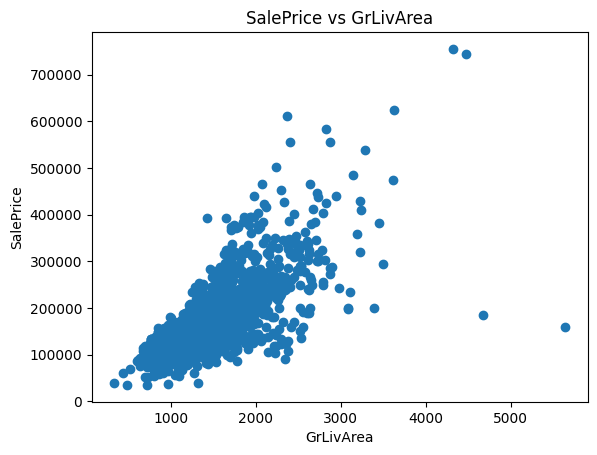

In [53]:
# Plot SalePrice against GrLivArea
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


TODO3

In [54]:
from sklearn.model_selection import train_test_split

X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=360, train_size=1100, random_state=6804)


TODO4

In [55]:
from sklearn.linear_model import LinearRegression
# Create the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the coefficients of the Linear Regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)

Coefficients:  [104.5130828]
Intercept:  22202.333118532086


TODO5

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 39302.701530626844
Mean Squared Error (MSE): 3311748194.272108
Root Mean Squared Error (RMSE): 57547.79052467704


TODO6

In [57]:
# Define the feature names and iterate over each feature
features = ["LotArea", "TotalBsmtSF", "GarageArea"]

for feature in features:
    print(f"Predicting 'SalePrice' using feature: {feature}")
    
    # Prepare the feature and target variable
    X = df[[feature]]
    y = df['SalePrice']
    
    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=360, train_size=1100, random_state=6804)

    # Create the Linear Regression model
    model = LinearRegression()

    # Train the model using the training data
    model.fit(X_train, y_train)

    # Make predictions using the test data
    y_pred = model.predict(X_test)

    # Calculate MAE, MSE, and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print the performance metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print()


Predicting 'SalePrice' using feature: LotArea
Mean Absolute Error (MAE): 59208.450456915816
Mean Squared Error (MSE): 6522443618.072318
Root Mean Squared Error (RMSE): 80761.64694997446

Predicting 'SalePrice' using feature: TotalBsmtSF
Mean Absolute Error (MAE): 48819.64761841993
Mean Squared Error (MSE): 4042240284.151375
Root Mean Squared Error (RMSE): 63578.61499082357

Predicting 'SalePrice' using feature: GarageArea
Mean Absolute Error (MAE): 44411.62041093023
Mean Squared Error (MSE): 3928478805.4548745
Root Mean Squared Error (RMSE): 62677.57817158281



TODO7

In [58]:
# Define the features and target variable
X = df[['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea']]
y = df['SalePrice']

# Create the Linear Regression model
model = LinearRegression()

# Train the model using all four variables
model.fit(X, y)

# Print the coefficients of the Linear Regression model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[i]}")

print("Intercept:", intercept)



Coefficients:
GrLivArea: 68.05911842298009
LotArea: 0.20421610210050822
TotalBsmtSF: 48.33831650052997
GarageArea: 103.20519411009808
Intercept: -24295.99945608998


TODO8

In [59]:
import itertools
# Initialize variables to keep track of the best feature combination and the lowest RMSE
best_feature_combination = None
best_rmse = float('inf')

# Iterate through all possible feature combinations
for r in range(1, len(X.columns) + 1):
    for feature_combination in itertools.combinations(X.columns, r):
        # Create a new model with the selected feature combination
        selected_features = list(feature_combination)
        X_selected = X[selected_features]

        # Create the Linear Regression model
        model = LinearRegression()

        # Train the model using the selected features
        model.fit(X_selected, y)

        # Make predictions using the entire dataset
        y_pred = model.predict(X_selected)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Update the best feature combination if the RMSE is lower
        if rmse < best_rmse:
            best_rmse = rmse
            best_feature_combination = selected_features

# Print the best feature combination and its RMSE
print("Best Feature Combination:", best_feature_combination)
print("Best RMSE:", best_rmse)


Best Feature Combination: ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea']
Best RMSE: 46120.23674642302
